# Weather Patten in Beirut, 2015

by Tarek Dib, 19 June 2016

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to explore the cool mountains of Lebanon. In this project I am going to use the historic weather data from the Weather Underground for Beirut to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2017 may be very different to 2015 but it should give me some indication of when would be a good time to take a summer break and get out of Beirut when it is hottest and most humid.

## Getting the data

To get the historic weather data for Beirut for 2015, right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Beirut' in the 'Location' input box and when the pop up menu comes up with the option 'Beirut, Lebanon' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2015 to: 31 December 2015 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data  and then right click on the blue link labelled 'Comma Delimited File'. Then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'BeirutWeatherHistory2015.csv'.

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [6]:
# Ignore warnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Import pandas package
from pandas import *
# Read the weather data for the City of Beirut in 2015
beirut = read_csv('BeirutWeatherHistory2015.csv', skipinitialspace=True)

## Cleaning the data

In [7]:
# Let's check the first few observations of the dataframe using the head method
beirut.head()

,EET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2015-1-1,21,17,13,13,9,7,73,58,40,...,8,7,5,29,11,NaN,0.25,4,Rain,195<br />
1,2015-1-2,19,16,13,12,11,8,83,73,57,...,8,7,5,21,13,NaN,2.03,5,Rain,162<br />
2,2015-1-3,17,14,12,12,9,7,88,74,59,...,10,8,6,24,11,45,17.02,5,Rain-Thunderstorm,122<br />
3,2015-1-4,16,13,10,12,9,6,83,71,59,...,10,8,6,19,11,NaN,4.06,3,Rain-Thunderstorm,149<br />
4,2015-1-5,17,14,12,12,8,6,85,60,40,...,10,8,6,42,23,61,0.00,5,Rain,178<br />


First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in the following analysis, but this is for illustration. We will rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. And then remove the < br /> html tag from the values in the specified field using the rstrip() method.

In [8]:
beirut = beirut.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})
beirut['WindDirDegrees'] = beirut['WindDirDegrees'].str.rstrip('<br />')
beirut['WindDirDegrees'].head(3)

0    195
1    162
2    122
Name: WindDirDegrees, dtype: object

In [4]:
# Check the data types of the fields in the beirut data frame
beirut.dtypes

EET                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                      int64
Events                         object
WindDirDegrees                 object
dtype: object

Change the values in the `'WindDirDegrees'` column to `float64`, and EET to datetime64:

In [10]:
beirut['WindDirDegrees'] = beirut['WindDirDegrees'].astype('float64')
beirut['EET'] = to_datetime(beirut['EET'])

It is best to change the index from the default to the `datetime64` values in the `'EET'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [11]:
beirut.index = beirut['EET']

## Finding a summer break

In Beirut, Lebanon, summer extends for the whole months of June, July, August and September where it gets very hot and humid. So  I'm going to create a dataframe that holds just those months using the `datetime` index, as shown below:

In [69]:
summer = beirut.ix[datetime(2015,6,1) : datetime(2015,9,30)]
summer.columns.values

array(['EET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'], dtype=object)

Check for the days with hot temperatures and high humidity.

In [32]:
summer[(summer['Mean TemperatureC'] >= 30) | (summer['Mean Humidity'] >= 80)]

,EET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
EET,,,,,,,,,,,,,,,,,,,,,
2015-07-24,2015-07-24,38,31,24,26,20,8,85,56,17,...,10,8,8,24,11,NaN,0,1,NaN,17
2015-07-25,2015-07-25,33,30,26,26,21,13,80,61,39,...,10,8,6,18,8,NaN,0,1,NaN,328
2015-08-02,2015-08-02,34,31,27,27,24,19,86,67,51,...,8,6,5,29,11,NaN,0,1,NaN,20
2015-08-03,2015-08-03,34,31,27,28,26,18,90,75,48,...,8,5,3,26,10,27,0,2,NaN,223
2015-08-04,2015-08-04,34,31,27,28,26,23,91,77,63,...,7,5,3,21,13,NaN,0,2,NaN,228
2015-08-05,2015-08-05,34,30,26,27,25,22,92,75,62,...,8,6,5,26,11,NaN,0,1,NaN,228
2015-08-11,2015-08-11,33,30,27,24,22,20,76,64,50,...,10,9,8,32,13,NaN,0,2,NaN,214
2015-08-16,2015-08-16,38,31,25,28,19,16,85,49,24,...,10,9,6,26,6,NaN,0,0,NaN,43
2015-08-17,2015-08-17,36,32,28,26,20,13,70,48,23,...,10,9,8,24,10,NaN,0,0,NaN,328


In the Summer of 2015, Beirut had 12 hot days i.e. mean temperature greater than 30 C and humidity more than 70%

Let's now plot the daily mean temperature of the Summer 2015 in Beirut. Then plot humidity in Summer 2015.

In [28]:
max(beirut['Max TemperatureC'])

41

Now let's plot the `'Mean TemperatureC'` and `'Mean Humidity'` for Beirut for the whole year of 2015:

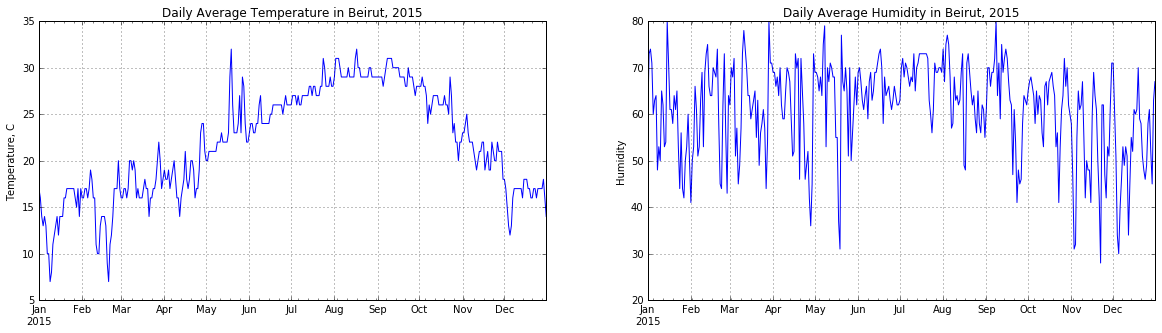

In [50]:
%matplotlib inline
from matplotlib import pylab
fig, axs = pylab.subplots(1,2, figsize=(20,5))

temp = beirut['Mean TemperatureC'].plot(ax=axs[0], title='Daily Average Temperature in Beirut, 2015', grid=True)
temp.set_ylabel("Temperature, C")
temp.set_xlabel(" ")
humidity = beirut['Mean Humidity'].plot(ax=axs[1], title='Daily Average Humidity in Beirut, 2015', grid=True)
humidity.set_ylabel("Humidity")
humidity.set_xlabel("")

#beirut[['Mean TemperatureC', 'Mean Humidity']].plot(grid=True, subplots=True, ax=axs)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0B483350>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x08AEF470>], dtype=object)

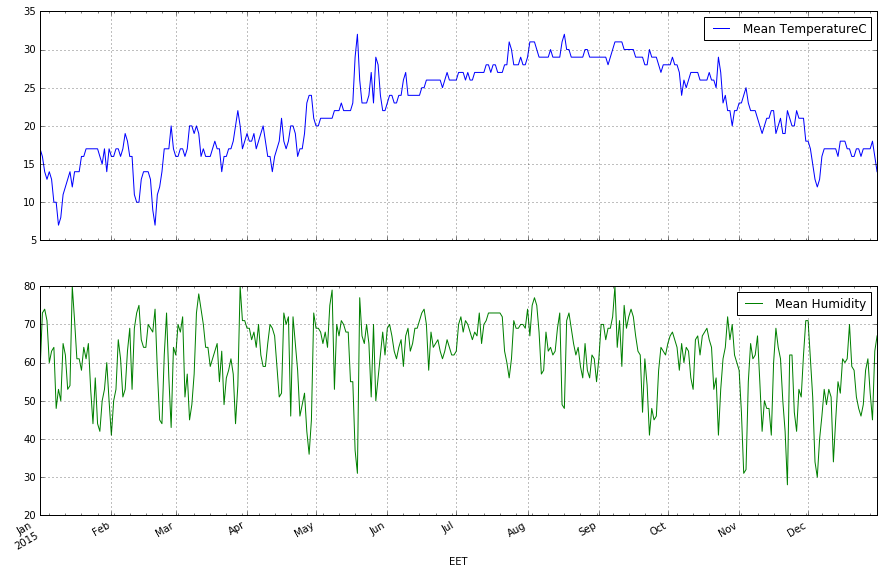

In [51]:
# Another way to plot the above
beirut[['Mean TemperatureC', 'Mean Humidity']].plot(grid=True, figsize=(15,10), subplots=True)

Well looking at the graph the months of August and September seem to be the hottest in Beirut. Looking at the daily average daily temperature, one may conclude that the best time to get away from Beirut and go up to the higher elevations is sometime bettween August and September. On the other hand, there is no clear trend for the average humidity in Beirut. This could be due to the location of Beirut along the Sea. 

Lets calculate the average humidity in Beirut for the whole year and for the Summer months.

In [59]:
beirut['Mean Humidity'].mean(), summer['Mean Humidity'].mean()

(61.25753424657534, 65.41803278688525)

From the graph and calculated average humidity, it doesn't seem that there is a high variability in humidity in Beirut. Estimated standard deviations confirm our observations as well.

In [62]:
beirut['Mean Humidity'].std(), summer['Mean Humidity'].std()

(9.885858445277284, 7.068543006187421)

[<matplotlib.text.Text at 0xe055e90>, <matplotlib.text.Text at 0xe040190>]

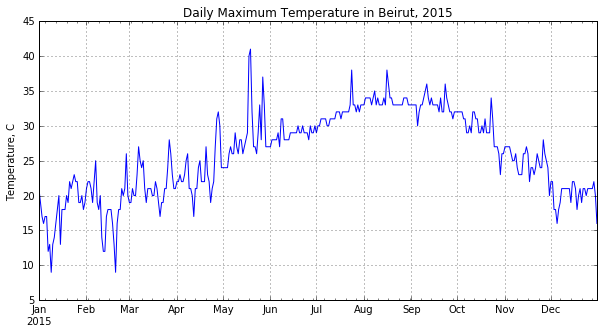

In [75]:
maxTemp = beirut['Max TemperatureC'].plot(grid=True, figsize=(10,5), title="Daily Maximum Temperature in Beirut, 2015")
maxTemp.set(xlabel="", ylabel="Temperature, C")

With few exceptions of high temperauters in mid and end of May, again the maximum temperatures occured from last week of July to mid August in 2015.

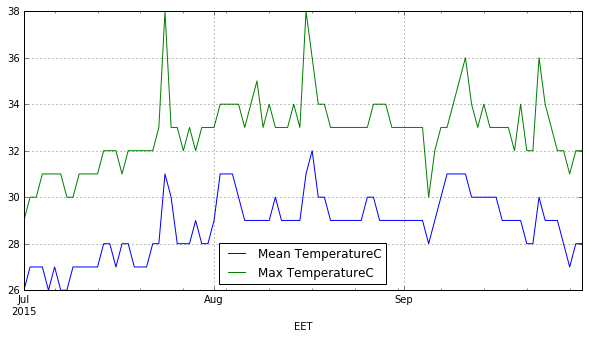

In [74]:
julyAugSept = summer.ix[datetime(2015,7,1) : datetime(2015,9,30)]
julyAugSept[['Mean TemperatureC', 'Max TemperatureC']].plot(grid=True, figsize=(10,5))

So definitely the end of July and the  first half of August is a great time to escape the heat of Beirut to the mountains of Lebanon.

## Conclusions

The graphs have shown that the hottest weeks of 2015 occurred sometime between July and August. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. In a different post, I will predict future weather patterns in the City of Beirut in the next two summers.